In [2]:
import pandas as pd
from IPython.display import display
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Merge csv files of IMDB movies and IMDB ratings

In [3]:
imdb_movies = pd.read_csv('IMDb movies.csv')
imdb_movies = imdb_movies[['imdb_title_id', 'title', 'year', 'genre','date_published']]
imdb_ratings = pd.read_csv('IMDb ratings.csv')
imdb_ratings = imdb_ratings[['imdb_title_id','weighted_average_vote', 'total_votes']]
imdb = pd.merge(imdb_movies, imdb_ratings, how='outer', on='imdb_title_id')
imdb

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,year,genre,date_published,weighted_average_vote,total_votes
0,tt0000009,Miss Jerry,1894,Romance,1894-10-09,5.9,154
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",1906-12-26,6.1,589
2,tt0001892,Den sorte drøm,1911,Drama,1911-08-19,5.8,188
3,tt0002101,Cleopatra,1912,"Drama, History",1912-11-13,5.2,446
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",1911-03-06,7.0,2237
...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,2020,Comedy,2020-01-29,5.3,398
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",2020-02-13,7.7,724
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,2019-03-08,7.9,265
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",2019-03-15,6.4,194


In [4]:
netflix = pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [5]:
merged = netflix.merge(imdb, how='inner', left_on=['title','release_year'], right_on=['title','year'])
merged.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb_title_id,year,genre,date_published,weighted_average_vote,total_votes
0,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",tt2100376,2011,Horror,2011-11-03,4.6,802
1,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",tt0472033,2009,"Animation, Action, Adventure",2009-09-09,7.1,131029
2,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,tt0478087,2008,"Crime, Drama, History",2008-04-18,6.8,225698
3,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,tt1301698,2008,"Horror, Mystery, Romance",2008-09-12,6.4,2863
4,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an...",tt0402022,2005,"Action, Adventure, Sci-Fi",2006-02-24,5.5,122927


In [6]:
merged = merged.drop(['show_id', 'type', 'date_added', 'listed_in', 'imdb_title_id', 'year'],axis=1)
merged

,title,director,cast,country,release_year,rating,duration,description,genre,date_published,weighted_average_vote,total_votes
0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"When an army recruit is found dead, his fellow...",Horror,2011-11-03,4.6,802
1,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi...","Animation, Action, Adventure",2009-09-09,7.1,131029
2,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,A brilliant group of students become card-coun...,"Crime, Drama, History",2008-04-18,6.8,225698
3,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2008,TV-MA,143 min,An architect and his wife move into a castle t...,"Horror, Mystery, Romance",2008-09-12,6.4,2863
4,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,2005,PG-13,93 min,"Aiming to hasten an uprising, the leader of an...","Action, Adventure, Sci-Fi",2006-02-24,5.5,122927
...,...,...,...,...,...,...,...,...,...,...,...,...
617,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,2004,TV-14,160 min,An accident on a bridge ties together three yo...,"Action, Drama, Thriller",2004-05-22,7.4,8381
618,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2011,TV-14,154 min,Three friends on an adventurous road trip/bach...,"Comedy, Drama",2011-07-15,8.1,65749
619,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"A political cartoonist, a crime reporter and a...","Crime, Drama, Mystery",2007-05-18,7.7,443791
620,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Dragged from civilian life, a former superhero...","Action, Adventure, Comedy",2006-08-11,4.4,18613


In [7]:
merged

,title,director,cast,country,release_year,rating,duration,description,genre,date_published,weighted_average_vote,total_votes
0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"When an army recruit is found dead, his fellow...",Horror,2011-11-03,4.6,802
1,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi...","Animation, Action, Adventure",2009-09-09,7.1,131029
2,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,A brilliant group of students become card-coun...,"Crime, Drama, History",2008-04-18,6.8,225698
3,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2008,TV-MA,143 min,An architect and his wife move into a castle t...,"Horror, Mystery, Romance",2008-09-12,6.4,2863
4,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,2005,PG-13,93 min,"Aiming to hasten an uprising, the leader of an...","Action, Adventure, Sci-Fi",2006-02-24,5.5,122927
...,...,...,...,...,...,...,...,...,...,...,...,...
617,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,2004,TV-14,160 min,An accident on a bridge ties together three yo...,"Action, Drama, Thriller",2004-05-22,7.4,8381
618,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2011,TV-14,154 min,Three friends on an adventurous road trip/bach...,"Comedy, Drama",2011-07-15,8.1,65749
619,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"A political cartoonist, a crime reporter and a...","Crime, Drama, Mystery",2007-05-18,7.7,443791
620,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Dragged from civilian life, a former superhero...","Action, Adventure, Comedy",2006-08-11,4.4,18613


In [8]:
merged.isna().sum()

title                    0
director                 2
cast                     0
country                  4
release_year             0
rating                   0
duration                 0
description              0
genre                    0
date_published           0
weighted_average_vote    0
total_votes              0
dtype: int64

In [11]:
merged['country'] = merged['country'].fillna(merged['country'].mode()[0])


In [12]:
merged.isna().sum()

title                    0
director                 2
cast                     0
country                  0
release_year             0
rating                   0
duration                 0
description              0
genre                    0
date_published           0
weighted_average_vote    0
total_votes              0
dtype: int64

# The best top 5 movies based on Genres in netflix

Action

In [7]:
top_action = merged.loc[(merged['genre'].str.contains('Action')) & (merged['total_votes']>300000)].sort_values('weighted_average_vote', ascending=False)
top_action.head()

,title,director,cast,country,release_year,rating,duration,description,genre,date_published,weighted_average_vote,total_votes
246,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",2010,PG-13,148 min,"In this mind-bending sci-fi thriller, a man ru...","Action, Adventure, Sci-Fi",2010-09-24,8.8,2002816
105,Casino Royale,Martin Campbell,"Daniel Craig, Judi Dench, Eva Green, Jeffrey W...","United Kingdom, Czech Republic, United States,...",2006,PG-13,145 min,Daniel Craig makes his debut as the newly mint...,"Action, Adventure, Thriller",2007-01-05,8.0,569968
149,District 9,Neill Blomkamp,"Sharlto Copley, Jason Cope, David James, Vanes...","South Africa, United States, New Zealand, Canada",2009,R,112 min,"After years of segregation and forced labor, a...","Action, Sci-Fi, Thriller",2009-09-25,7.9,630278
470,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",2009,PG-13,128 min,The game is afoot for an eccentric detective w...,"Action, Adventure, Mystery",2009-12-25,7.6,574055
459,Scott Pilgrim vs. the World,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...","United States, United Kingdom, Canada, Japan",2010,PG-13,112 min,Dreamy delivery girl Ramona captures Scott Pil...,"Action, Comedy, Fantasy",2010-11-19,7.5,368833


Horror

In [8]:
top_horror = merged.loc[(merged['genre'].str.contains('Horror')) & (merged['total_votes']>200000)].sort_values('weighted_average_vote', ascending=False)
top_horror.head()

,title,director,cast,country,release_year,rating,duration,description,genre,date_published,weighted_average_vote,total_votes
556,The Ring,Gore Verbinski,"Naomi Watts, Martin Henderson, David Dorfman, ...",United States,2002,PG-13,116 min,A reporter watches a video that supposedly set...,"Horror, Mystery",2003-02-21,7.1,315069
123,Cloverfield,Matt Reeves,"Lizzy Caplan, Jessica Lucas, T.J. Miller, Mich...",United States,2008,PG-13,85 min,A going-away party in Manhattan is interrupted...,"Action, Adventure, Horror",2008-02-01,7.0,367611
224,Hellboy,Guillermo del Toro,"Ron Perlman, John Hurt, Selma Blair, Rupert Ev...",United States,2004,PG-13,122 min,This fast-paced action flick tells the dark st...,"Action, Fantasy, Horror",2004-10-08,6.8,302680
249,Insidious,James Wan,"Patrick Wilson, Rose Byrne, Lin Shaye, Ty Simp...","United States, Canada, United Kingdom",2010,PG-13,103 min,"Hoping to leave their haunted house behind, a ...","Horror, Mystery, Thriller",2011-10-28,6.8,271766
178,Final Destination,James Wong,"Devon Sawa, Ali Larter, Kerr Smith, Kristen Cl...",United States,2000,R,98 min,After narrowly avoiding a fatal plane explosio...,"Horror, Thriller",2000-08-25,6.7,224856


Comedy

In [9]:
top_comedy = merged.loc[(merged['genre'].str.contains('Comedy')) & (merged['total_votes']>300000)].sort_values('weighted_average_vote', ascending=False)
top_comedy.head()

,title,director,cast,country,release_year,rating,duration,description,genre,date_published,weighted_average_vote,total_votes
7,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,2009,PG-13,164 min,While attending one of India's premier college...,"Comedy, Drama",2009-12-25,8.4,332217
46,American Psycho,Mary Harron,"Christian Bale, Willem Dafoe, Jared Leto, Rees...","United States, Canada",2000,R,102 min,With chiseled good looks that belie his insani...,"Comedy, Crime, Drama",2001-05-25,7.6,473137
459,Scott Pilgrim vs. the World,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...","United States, United Kingdom, Canada, Japan",2010,PG-13,112 min,Dreamy delivery girl Ramona captures Scott Pil...,"Action, Comedy, Fantasy",2010-11-19,7.5,368833
339,Men in Black,Barry Sonnenfeld,"Tommy Lee Jones, Will Smith, Linda Fiorentino,...",United States,1997,PG-13,98 min,A streetwise cop teams with a veteran governme...,"Action, Adventure, Comedy",1997-10-03,7.3,506999
340,Men in Black II,Barry Sonnenfeld,"Tommy Lee Jones, Will Smith, Rip Torn, Lara Fl...",United States,2002,PG-13,88 min,Will Smith and Tommy Lee Jones reprise their r...,"Action, Adventure, Comedy",2002-09-13,6.2,337088


# Top Movies ALL Genre

In [13]:
top_movies = merged.loc[merged['total_votes']>300000].sort_values('weighted_average_vote', ascending=False).head()
top_movies

,title,director,cast,country,release_year,rating,duration,description,genre,date_published,weighted_average_vote,total_votes
416,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,1994,R,154 min,This stylized crime caper weaves together stor...,"Crime, Drama",1994-10-28,8.9,1780147
457,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,1993,R,195 min,Oskar Schindler becomes an unlikely humanitari...,"Biography, Drama, History",1994-03-11,8.9,1183248
246,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",2010,PG-13,148 min,"In this mind-bending sci-fi thriller, a man ru...","Action, Adventure, Sci-Fi",2010-09-24,8.8,2002816
118,City of God,"Fernando Meirelles, Katia Lund","Alexandre Rodrigues, Leandro Firmino, Phellipe...","Brazil, France, Germany",2002,R,130 min,"Growing up in a Rio de Janeiro slum, Rocket is...","Crime, Drama",2003-05-09,8.6,685856
45,American History X,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",United States,1998,R,119 min,A neo-Nazi gets sent to prison for murder and ...,Drama,1999-08-27,8.5,1014218


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Pulp Fiction'),
  Text(1, 0, "Schindler's List"),
  Text(2, 0, 'Inception'),
  Text(3, 0, 'City of God'),
  Text(4, 0, 'American History X')])

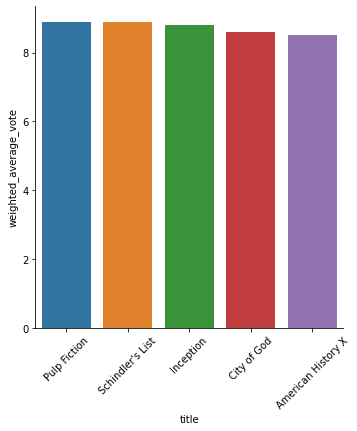

In [11]:
sns.catplot(x="title", y='weighted_average_vote', kind='bar', data=top_movies)
plt.xticks(rotation=45)

# Number of Movies Produced by Country

In [93]:
country = merged.groupby('country').size().to_frame('Value').sort_values('Value',ascending=False).reset_index()
country = country.head()

Top 5 Countries

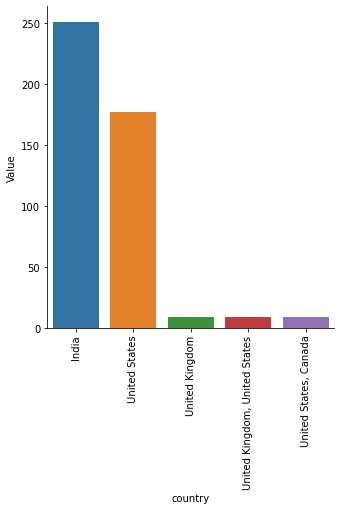

In [95]:
country_graph = sns.catplot(data=country, x='country', y='Value', kind='bar')
country_graph.set_xticklabels(rotation=90)

# Number of Movies based on release Year

In [65]:
year = merged.groupby('release_year').size().to_frame('No. of Movies').reset_index()
year.head()

,release_year,No. of Movies
0,1958,1
1,1960,1
2,1962,2
3,1964,1
4,1966,1


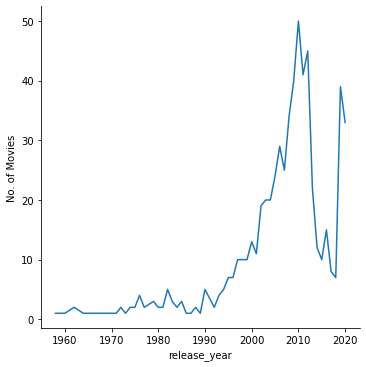

In [66]:
sns.relplot(x="release_year", y="No. of Movies", kind="line", data=year)

# Most Popular Genre based on Total Votes

In [51]:
merged.groupby('genre')['total_votes'].size().sort_values(ascending=False).head()

genre
Drama                     54
Comedy, Drama, Romance    32
Action, Crime, Drama      30
Drama, Romance            28
Comedy, Drama             27
Name: total_votes, dtype: int64